# TODO: Correct MAE calculation.

In [1]:
import numpy as np
from helpers import get_dff_fat
from constants_v1 import *
# Plotting
import pandas as pd
from helpers_pd import *
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
# plt.style.use('seaborn-white')
import matplotlib.pyplot as plt

In [2]:
df = get_dff_fat(new=False, copy=True)
# df['K_d'] = df.loc[:, 'k_oc'] * df.loc[:,'f_oc']

In [3]:
# list(df)

In [4]:
# For later, 'KGE-d13C_out', 'NSE-d13C_out'
dfs = df[['Model', 
          'z3_factor',
          'cZ0Z1',
          'cZ',
          'c_adr',
          'k_g',
          'gamma01',
          'gammaZ',
          'f_transp',
          'f_oc',
          'k_oc',
          'beta_runoff',
          'dt_50_aged',
          'dt_50_ab',
          'dt_50_ref',
          'epsilon_iso',
          'beta_moisture',
          'MAE-CONC-tra', 'MAE-d13C-tra',
          'KGE-CONC-tra', 'KGE-CONC-tot', 'KGE-CONC-det',
          'KGE-d13C-tra',
          'NSE-CONC-tra', 'NSE-CONC-tot', 'NSE-CONC-det', 
          ]]

In [5]:
print( dfs['MAE-CONC-tra'].min(), dfs['MAE-d13C-tra'].min() )

# dfs['BIAS-CONC_out'].min()
# dfs['BIAS-LDS_out'].min()

(-1.92876184869932, -6.623429411764704)


In [6]:
# ff_out = dfs.loc[(dfs['KGE-CONC-tra'] > 0.0)] # & (dfs['KGE-LDS_out'] > 0) ]
ff_out = dfs.loc[(dfs['NSE-CONC-tra'] > 0) & (dfs['KGE-d13C-tra'] > 0.5)] # & (dfs['KGE-LDS_out'] > 0) ]
print(len(ff_out))

192


In [7]:
ff_out.head()

,Model,z3_factor,cZ0Z1,cZ,c_adr,k_g,gamma01,gammaZ,f_transp,f_oc,...,beta_moisture,MAE-CONC-tra,MAE-d13C-tra,KGE-CONC-tra,KGE-CONC-tot,KGE-CONC-det,KGE-d13C-tra,NSE-CONC-tra,NSE-CONC-tot,NSE-CONC-det
LHS_be1fix3/112/,fix,0.882861,0.466585,0.201524,0.863642,1635.935886,0.897126,0.741502,0.195599,0.013272,...,0.985648,0.459786,-0.573815,0.551554,0.593783,0.600410,0.534124,0.152786,-0.719494,-1.044928
LHS_be1fix3/148/,fix,0.924313,0.757313,0.144976,0.640416,3477.250532,0.604089,0.166865,0.708498,0.011126,...,0.781720,0.461931,-0.155906,0.551618,0.593543,0.600056,0.741371,0.153759,-0.713871,-1.037897
LHS_be1fix3/197/,fix,0.895424,0.518584,0.335178,0.898474,1558.832448,0.698055,0.527449,0.521571,0.046899,...,0.489091,0.272628,-0.199194,0.598135,0.631152,0.631449,0.716310,0.124967,-0.803635,-1.154434
LHS_be1fix3/208/,fix,0.754460,0.727751,0.329954,0.600988,3605.458247,0.693807,0.428216,0.372965,0.023011,...,0.646620,0.313248,0.865553,0.588921,0.623865,0.625335,0.694843,0.136256,-0.782890,-1.128188
LHS_be1fix3/210/,fix,0.864542,0.810320,0.202864,0.180167,2991.845277,0.938496,0.054087,0.199628,0.039649,...,0.813236,0.487106,0.855791,0.544734,0.588521,0.596315,0.697476,0.153564,-0.710003,-1.032095


In [8]:
# New constraint
ff_out['IsoCstr'] = ff_out.apply(IsoKGEsoil, args=(0.8,), axis=1)

dm_simp = pd.melt(ff_out, 
                 id_vars=['KGE-CONC-tra', 'NSE-CONC-tra', 'Model', 'IsoCstr'],
             value_vars=['z3_factor',
                         'cZ0Z1',
                         'cZ',
                         'c_adr',
                         'k_g',
                         'gamma01',
                         'gammaZ',
                         'f_transp',
                         'f_oc',
                         'k_oc',
                         'beta_runoff',
                         'dt_50_aged',
                         'dt_50_ab',
                         'dt_50_ref',
                         'epsilon_iso',
                         'beta_moisture'])
dm_simp.head()

,KGE-CONC-tra,NSE-CONC-tra,Model,IsoCstr,variable,value
0,0.551554,0.152786,fix,KGE-d13C < 0.8,z3_factor,0.882861
1,0.551618,0.153759,fix,KGE-d13C < 0.8,z3_factor,0.924313
2,0.598135,0.124967,fix,KGE-d13C < 0.8,z3_factor,0.895424
3,0.588921,0.136256,fix,KGE-d13C < 0.8,z3_factor,0.754460
4,0.544734,0.153564,fix,KGE-d13C < 0.8,z3_factor,0.864542


## Soils, fix vs. var

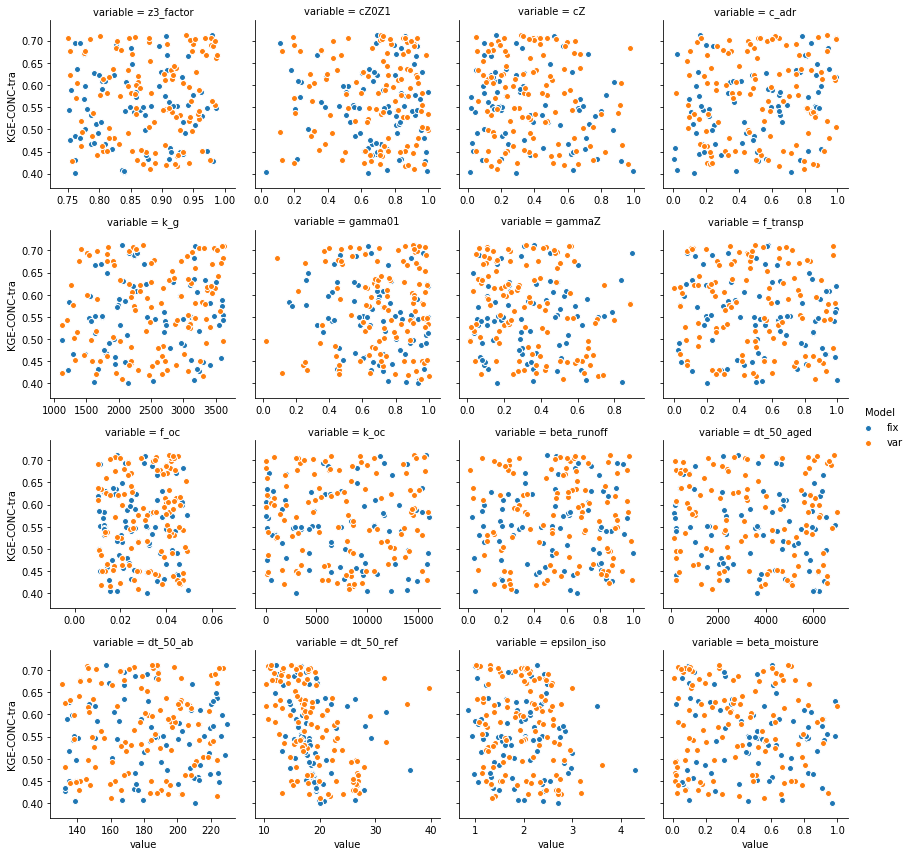

In [9]:
g = sns.FacetGrid(dm_simp, col="variable", hue="Model", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", "KGE-CONC-tra", edgecolor="w").add_legend()

## Soils, IsoConstraint

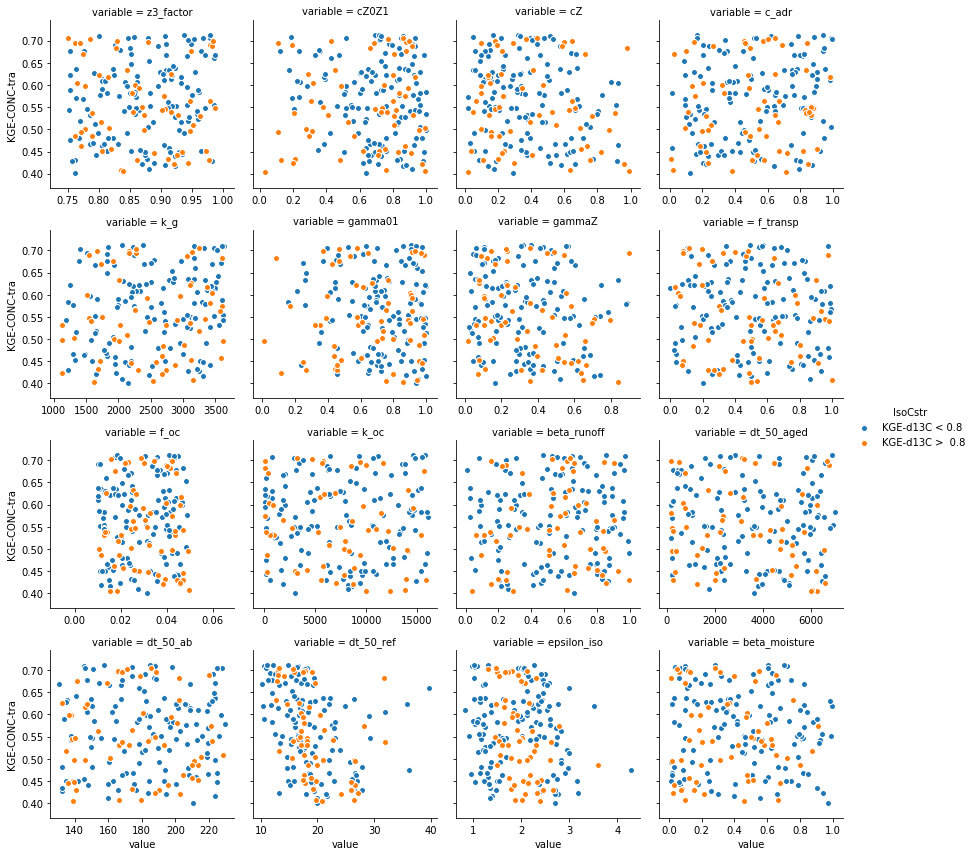

In [10]:
g = sns.FacetGrid(dm_simp, col="variable", hue="IsoCstr", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", "KGE-CONC-tra", edgecolor="w").add_legend()

May want to show the full separation between models as well!

In [11]:
ff_out['ModIsoCstr'] = ff_out.apply(ModelIsoKGEsoil, args=(0.8,), axis=1)

In [12]:
dm = pd.melt(ff_out, 
                 id_vars=['KGE-CONC-tra', 'NSE-CONC-tra', 'Model', 'IsoCstr', 'ModIsoCstr'],
             value_vars=['z3_factor',
                         'cZ0Z1',
                         'cZ',
                         'c_adr',
                         'k_g',
                         'gamma01',
                         'gammaZ',
                         'f_transp',
                         'f_oc',
                         'k_oc',
                         'beta_runoff',
                         'dt_50_aged',
                         'dt_50_ab',
                         'dt_50_ref',
                         'epsilon_iso',
                         'beta_moisture'])

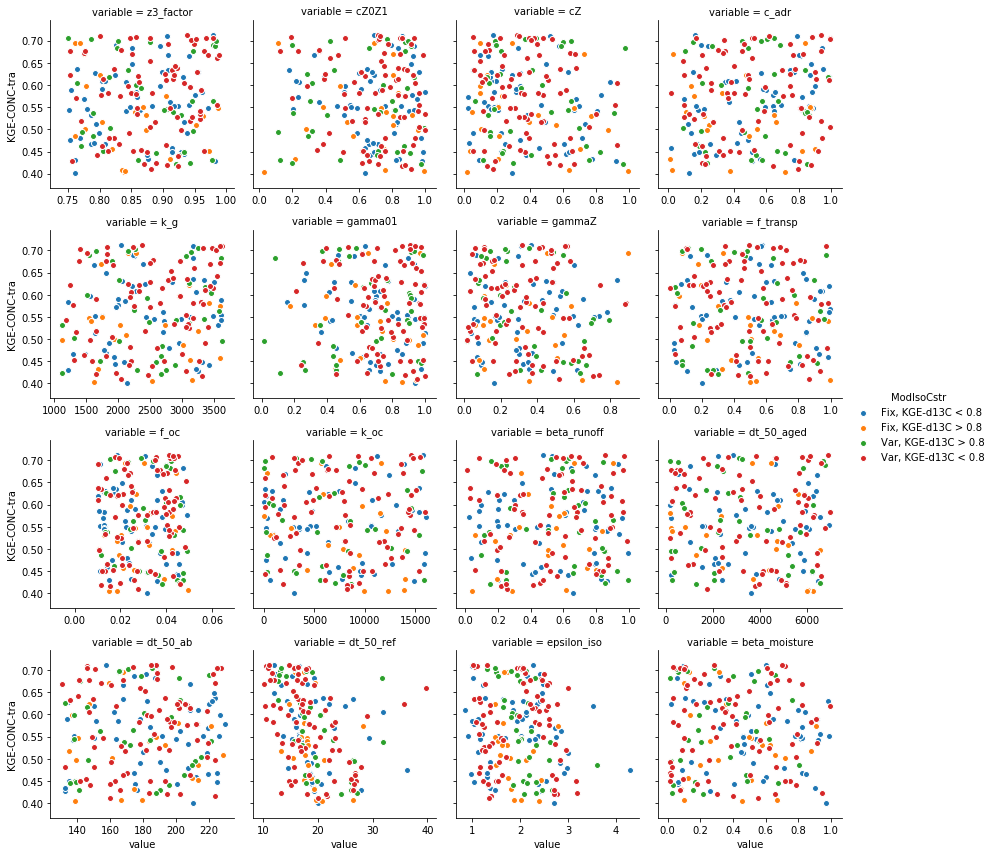

In [13]:
g = sns.FacetGrid(dm, col="variable", hue="ModIsoCstr", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", "KGE-CONC-tra", edgecolor="w").add_legend()

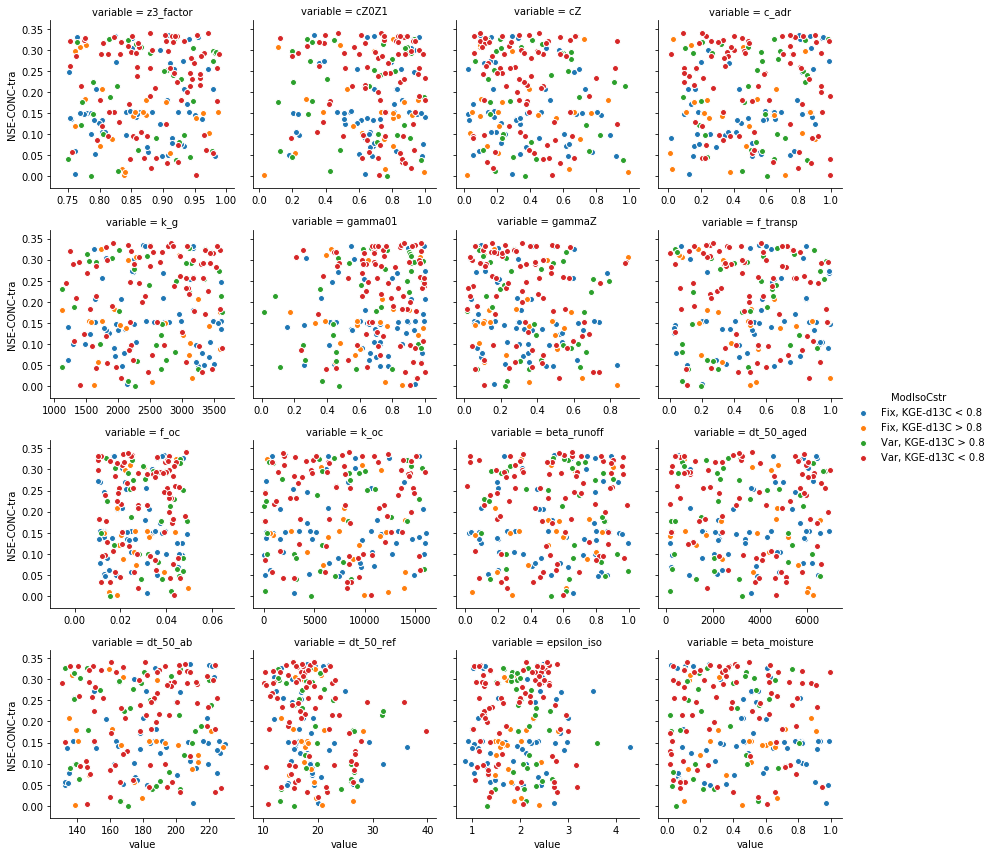

In [14]:
g = sns.FacetGrid(dm, col="variable", hue="ModIsoCstr", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", "NSE-CONC-tra", edgecolor="w").add_legend()